In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'hello#$@'
a.translate(s)

'hello'

In [3]:
# to remove stop words
stop_words = stopwords.words('english')
# to remove punctuation
translator = str.maketrans('', '', punctuation)

In [4]:
def clean_text(documents: list, path: str) -> int:
    max_length_text = 0
    for file in os.listdir(path):
        with open (path + file) as f:
            text = f.read()
            # split words
            tokens = word_tokenize(text)
            # remove punctuation
            tokens = [token.translate(translator) for token in tokens]
            # remove stop words
            tokens = [token for token in tokens if token not in stop_words]
            if len(tokens) > max_length_text:
                max_length_text = len(tokens)
            # concatenate all clean words
            tokens = ' '.join(tokens)
            documents.append(tokens)
    return max_length_text

In [5]:
# for negative texts
negative_max_length_text = 0
negative_documents = []
negative_direction = 'data/neg/'
negative_max_length_text = clean_text(negative_documents, negative_direction)
print(negative_max_length_text)

1400


In [6]:
# for positive texts
positive_max_length_text = 0
positive_documents = []
positive_direction = 'data/pos/'
positive_max_length_text = clean_text(positive_documents, positive_direction)
print(positive_max_length_text)

1693


In [7]:
max_length_text = max(negative_max_length_text, positive_max_length_text)

In [8]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [9]:
# create train data
X_train = negative_documents[:800] + positive_documents[:800]
len(X_train)

1600

In [10]:
# create labels for train data
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]
len(y_train)

1600

In [11]:
# create test data
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [12]:
# create labels for test data
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]
len(y_test)

400

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
vocabulary_size = len(tokenizer.word_index) + 1

In [16]:
# make data numerical
encoded = tokenizer.texts_to_sequences(X_train)
encoded[0]

[15104,
 1522,
 28,
 281,
 1177,
 7885,
 10232,
 1076,
 710,
 575,
 1625,
 1,
 8542,
 357,
 2414,
 18307,
 4061,
 1540,
 5289,
 813,
 808,
 1177,
 132,
 38,
 374,
 552,
 11434,
 1177,
 872,
 1830,
 43,
 6856,
 3225,
 19,
 57,
 859,
 1,
 458,
 2727,
 127,
 21,
 269,
 10,
 4601,
 2728,
 3130,
 260,
 54,
 259,
 4062,
 3544,
 12972,
 1178,
 4404,
 23980,
 18308,
 12973,
 560,
 199,
 2469,
 4405,
 189,
 1453,
 668,
 1426,
 223,
 4224,
 19,
 1177,
 23981,
 3646,
 189,
 656,
 24,
 1076,
 710,
 575,
 393,
 10,
 1831,
 154,
 2729,
 9318,
 459,
 1091,
 102,
 32,
 575,
 199,
 119,
 564,
 491,
 1162,
 4602,
 3130,
 12974,
 923,
 12975,
 575,
 23982,
 2350,
 268,
 2168,
 281,
 231,
 18309,
 1211,
 4406,
 1124,
 1287,
 1100,
 107,
 1831,
 1287,
 468,
 10233,
 11435,
 54,
 259,
 860,
 3130,
 2799,
 6857,
 1177,
 627,
 525,
 3545,
 3546,
 132,
 39,
 259,
 3,
 4225,
 7886,
 2602,
 5014,
 182,
 323,
 253,
 1179,
 1666,
 364,
 1596,
 467,
 154,
 961,
 11436,
 1769,
 112,
 948,
 4407,
 210,
 87,
 69,
 582

In [17]:
padded = pad_sequences(encoded, maxlen=max_length_text, padding='post')
padded[0]

array([15104,  1522,    28, ...,     0,     0,     0])

In [18]:
 padded.shape

(1600, 1693)

In [20]:

input1 = Input(shape=(max_length_text,))
embedding1 = Embedding(vocabulary_size, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
dropout1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(dropout1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_length_text,))
embedding2 = Embedding(vocabulary_size, 100)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
dropout2 = Dropout(0.5)(conv2)
pool2 = MaxPool1D(pool_size=2)(dropout2)
flat2 = Flatten()(pool2)

input3 = Input(shape=(max_length_text,))
embedding3 = Embedding(vocabulary_size, 100)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
dropout3 = Dropout(0.5)(conv3)
pool3 = MaxPool1D(pool_size=2)(dropout3)
flat3 = Flatten()(pool3)

input4 = Input(shape=(max_length_text,))
embedding4 = Embedding(vocabulary_size, 100)(input4)
conv4 = Conv1D(filters=32, kernel_size=10, activation='relu')(embedding4)
dropout4 = Dropout(0.5)(conv4)
pool4 = MaxPool1D(pool_size=2)(dropout4)
flat4 = Flatten()(pool4)

conc = concatenate([flat1, flat2, flat3, flat4])

dense1 = Dense(10, activation='relu')(conc)
output = Dense(1, activation='sigmoid')(dense1)

In [21]:
model = Model(inputs=[input1, input2, input3, input4], outputs=output)

In [22]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                              

In [25]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_length_text, padding='post')


In [26]:
import numpy as np

In [27]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
history = model.fit([padded, padded, padded, padded], y_train, epochs=10, batch_size=20, validation_data=([padded_test, padded_test, padded_test, padded_test], y_test))

Epoch 1/10
80/80 [==============================] - 102s 1s/step - loss: 0.7020 - accuracy: 0.5506 - val_loss: 0.6827 - val_accuracy: 0.5450
Epoch 2/10
80/80 [==============================] - 104s 1s/step - loss: 0.5811 - accuracy: 0.6981 - val_loss: 0.5572 - val_accuracy: 0.7400
Epoch 3/10
80/80 [==============================] - 110s 1s/step - loss: 0.3757 - accuracy: 0.9375 - val_loss: 0.5058 - val_accuracy: 0.7925
Epoch 4/10
80/80 [==============================] - 98s 1s/step - loss: 0.3065 - accuracy: 0.9856 - val_loss: 0.4808 - val_accuracy: 0.8100
Epoch 5/10
80/80 [==============================] - 96s 1s/step - loss: 0.2795 - accuracy: 0.9950 - val_loss: 0.4691 - val_accuracy: 0.8225
Epoch 6/10
80/80 [==============================] - 98s 1s/step - loss: 0.2603 - accuracy: 0.9975 - val_loss: 0.4589 - val_accuracy: 0.8300
Epoch 7/10
80/80 [==============================] - 97s 1s/step - loss: 0.2445 - accuracy: 0.9969 - val_loss: 0.4484 - val_accuracy: 0.8325
Epoch 8/10
80/80 

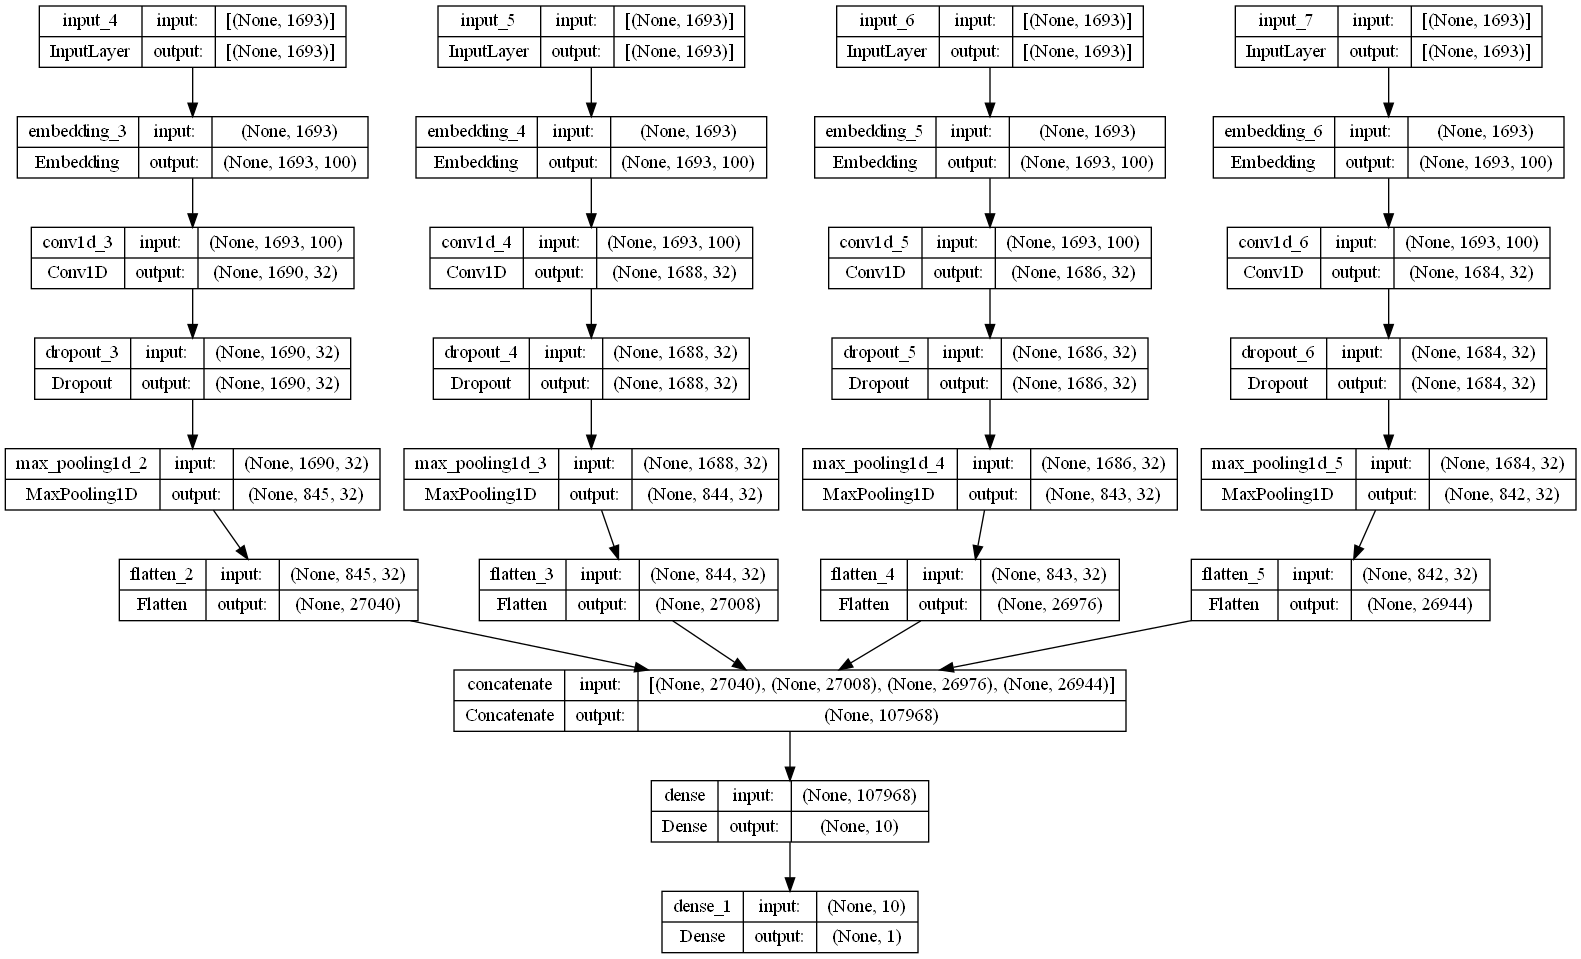

In [24]:
plot_model(model, show_shapes=True)